In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Load data from CSV file
df = pd.read_csv('responses.csv')

list_to_drop = df.columns[0:31]
list_to_drop_2 = df.columns[63:]
df =df.drop(list_to_drop,axis=1)
df.drop(list_to_drop_2,axis=1,inplace = True)
df.dropna(axis=0,inplace = True)

df.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [ ]:
# splite the data
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
#calculate corre matrix
# Calculate correlation matrix


corr_matrix = train_data.corr()

print(corr_matrix)

                         History  Psychology  Politics  Mathematics   Physics  \
History                 1.000000    0.286396  0.386030     0.021743  0.092645   
Psychology              0.286396    1.000000  0.177015     0.079624  0.109129   
Politics                0.386030    0.177015  1.000000     0.127721  0.164671   
Mathematics             0.021743    0.079624  0.127721     1.000000  0.589075   
Physics                 0.092645    0.109129  0.164671     0.589075  1.000000   
Internet               -0.008124    0.023565  0.033254     0.136108  0.103646   
PC                      0.056144   -0.056056  0.140437     0.288550  0.355338   
Economy Management      0.045311    0.092288  0.293045     0.239568  0.010159   
Biology                 0.030356    0.194297 -0.047181     0.085384  0.218473   
Chemistry               0.019909    0.062375 -0.028585     0.186613  0.340575   
Reading                 0.281782    0.236058  0.093566     0.000835 -0.054166   
Geography               0.31

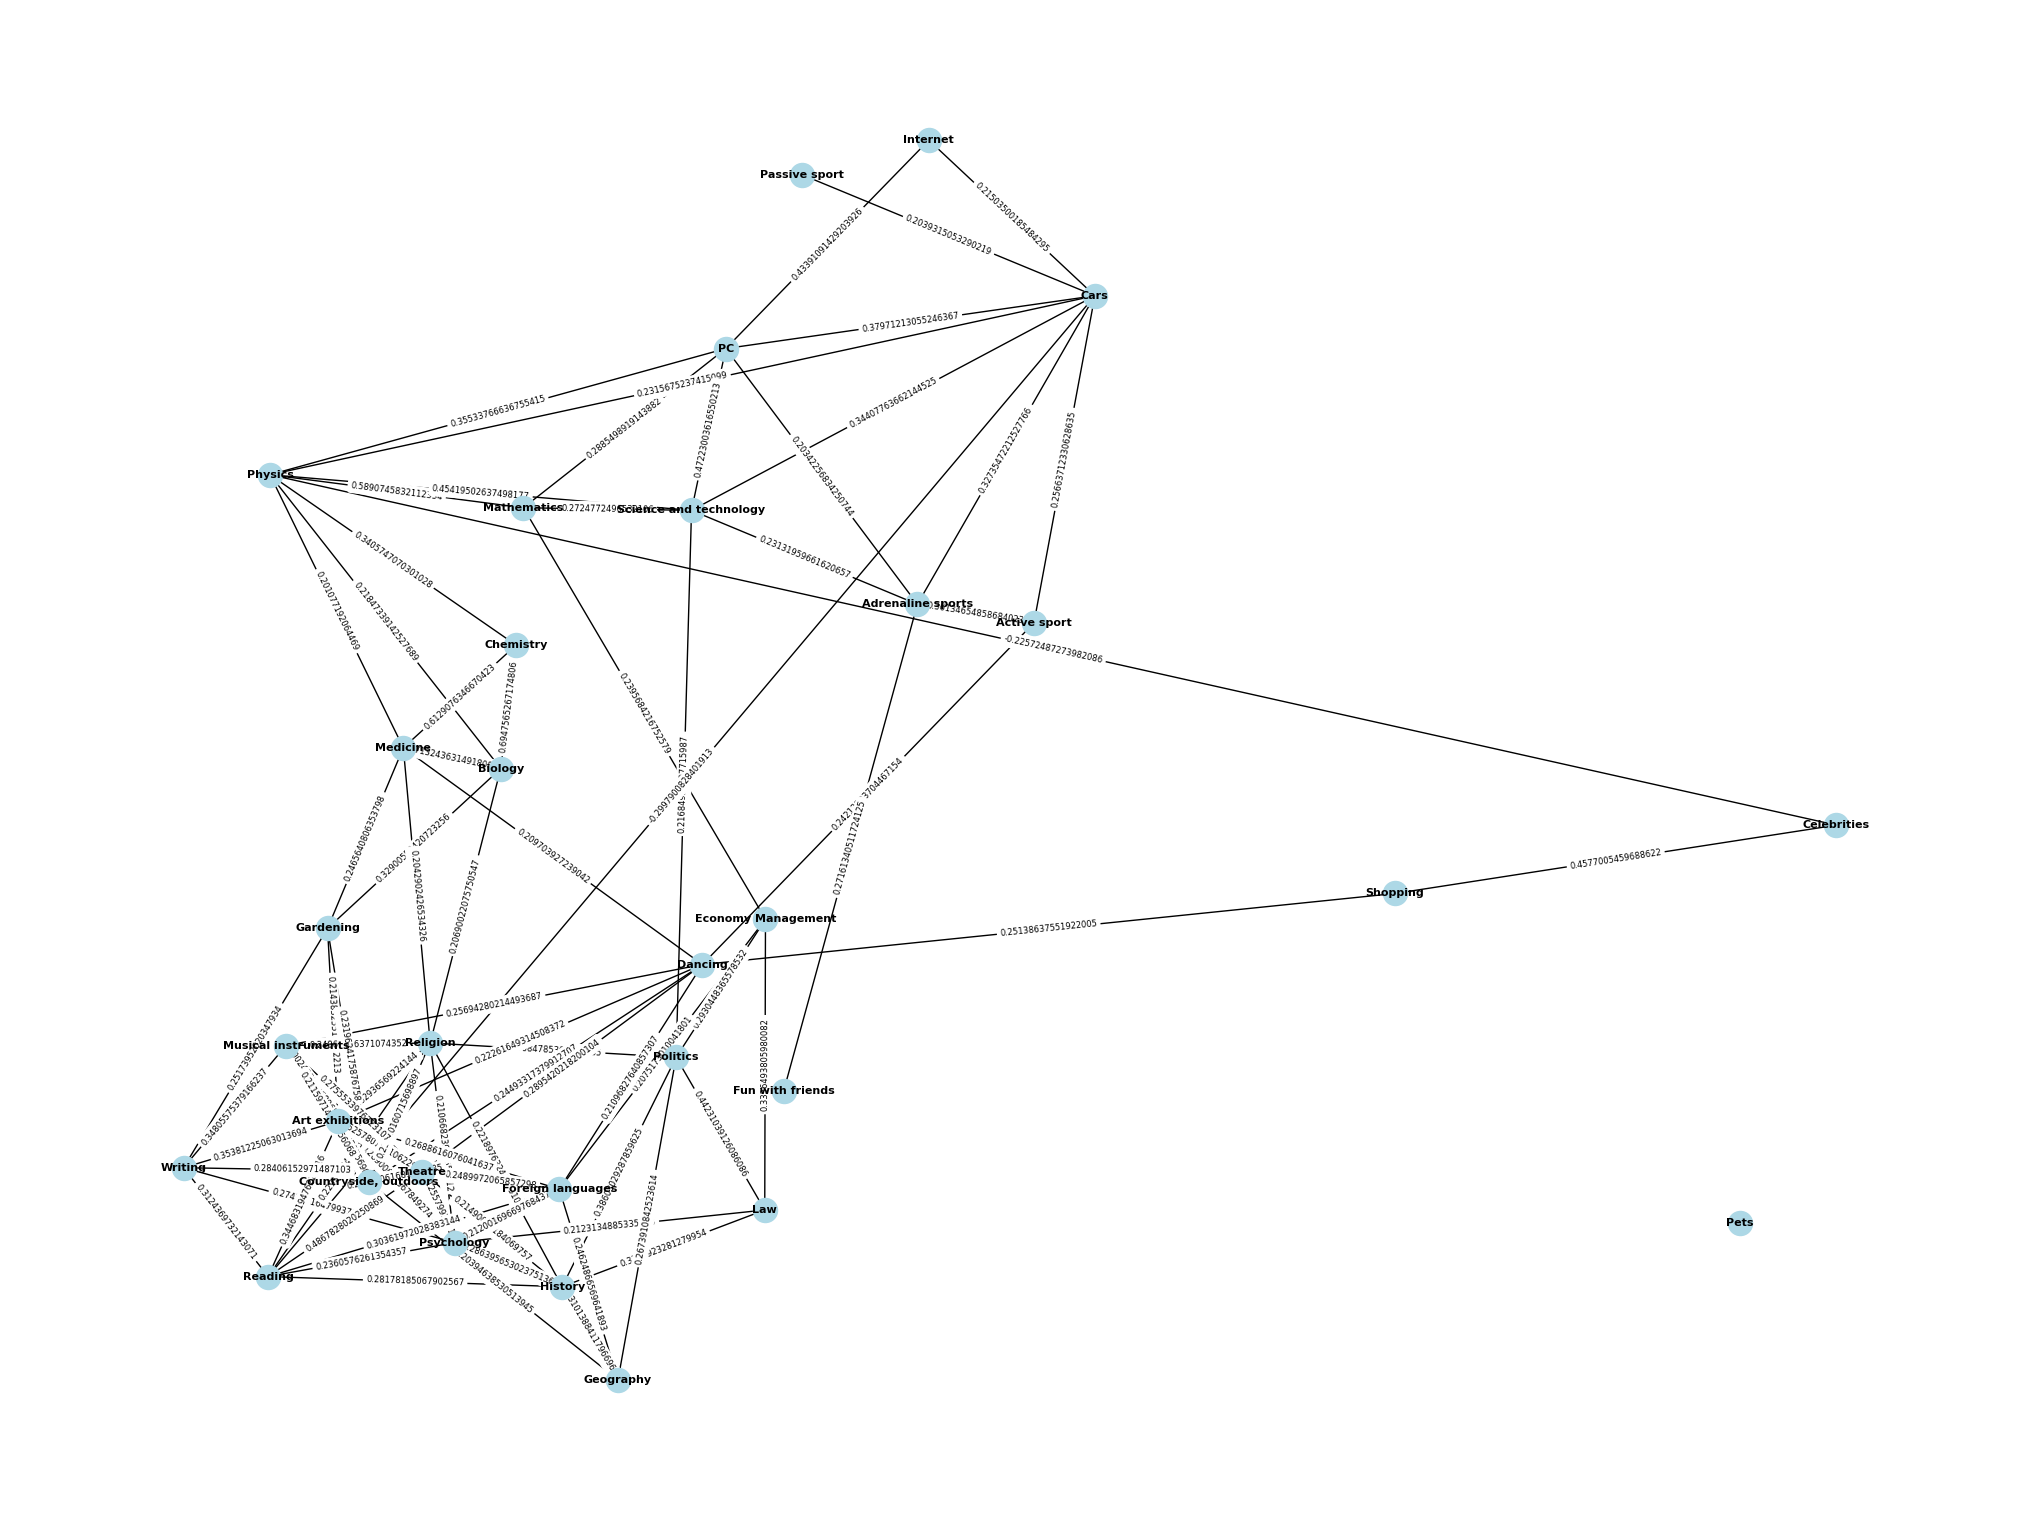

In [ ]:
# create a weighted graph
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for node in corr_matrix.columns:
    G.add_node(node)

# Add edges to the graph
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        weight = corr_matrix.iloc[i,j]  # get the weight from the correlation matrix
        if abs(weight) > 0.2:  # set a threshold for the weights
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=weight)


# set edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

# draw graph
plt.figure(figsize=(20, 15))  # increase width to 10 inches
pos = nx.spring_layout(G, k=0.3, seed=42)
nx.draw(G, pos=pos, with_labels=True, node_color="lightblue", font_size=8, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6)
plt.axis("off")
plt.show()

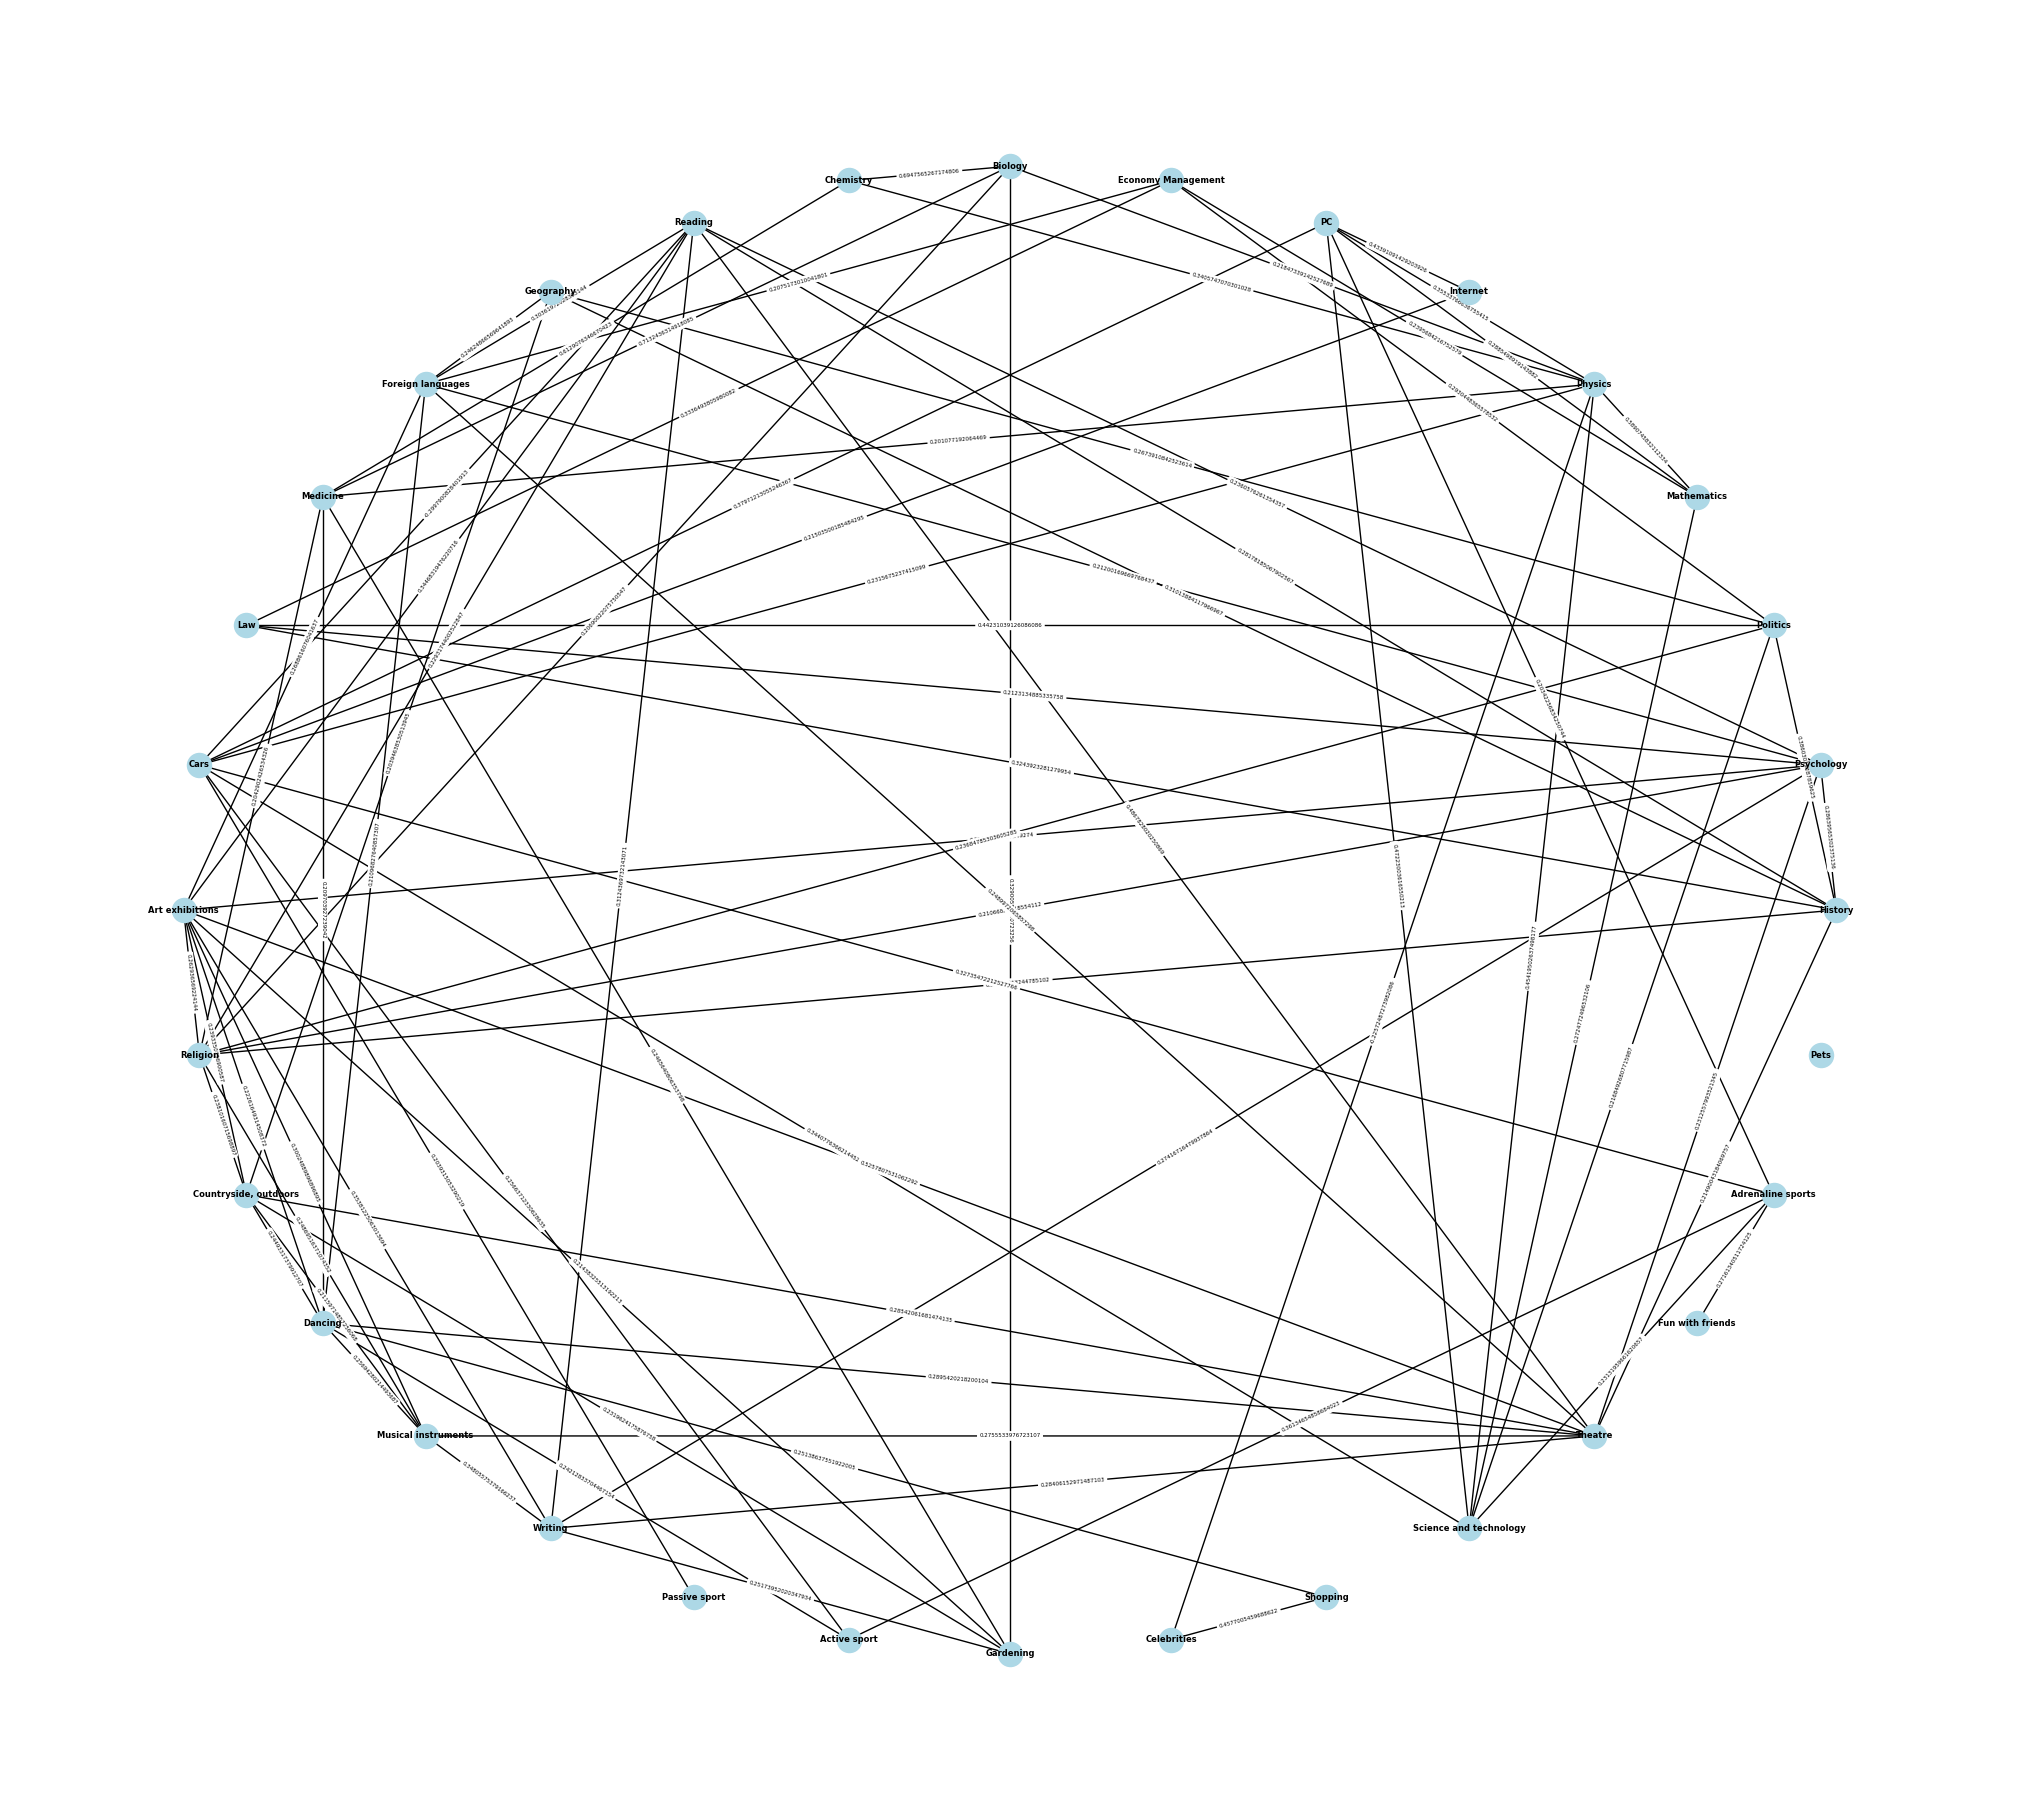

In [ ]:
# create a weighted graph
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for node in corr_matrix.columns:
    G.add_node(node)

# Add edges to the graph
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        weight = corr_matrix.iloc[i,j]  # get the weight from the correlation matrix
        if abs(weight) > 0.2:  # set a threshold for the weights
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=weight)

# Set edge labels
edge_labels = nx.get_edge_attributes(G, "weight")

# Draw graph with circular layout
plt.figure(figsize=(20, 18))  # smaller figure size
pos = nx.circular_layout(G)  # circular layout
nx.draw(G, pos=pos, with_labels=True, node_color="lightblue", font_size=6, font_weight="bold")  # smaller font size
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=4)  # smaller font size
plt.axis("off")
plt.show()

In [ ]:
####### crate train set ######

# Initialize an empty dictionary to store the preferred hobbies for each person
preferred_hobbies_dict_train = {}

# Loop over all the rows in the dataset
for person_index in train_data.index:
    # Initialize an empty list to store the person's preferred hobbies
    preferred_hobbies = []

    # Loop over all the columns in the row
    for hobby_name in df.columns:
        # Get the hobby rating for this person and hobby
        hobby_rating = df.loc[person_index, hobby_name]

        # Check if the hobby rating is 5 or 4
        if hobby_rating == 5:
            # Add the hobby and its rating to the beginning of the preferred hobbies list
            preferred_hobbies.insert(0, (hobby_name, hobby_rating))
        elif hobby_rating == 4:
            # Add the hobby and its rating to the end of the preferred hobbies list
            preferred_hobbies.append((hobby_name, hobby_rating))

    # Add the person's preferred hobbies to the dictionary
    preferred_hobbies_dict_train[person_index] = preferred_hobbies
# Print the preferred hobbies and their ratings for each person
for person_index, preferred_hobbies in preferred_hobbies_dict_train.items():
    print(f"Person {person_index}:")
    for hobby, rating in preferred_hobbies:
        print(f"\tHobby: {hobby}\tRating: {rating}")

Streaming output truncated to the last 5000 lines.
	Hobby: Countryside, outdoors	Rating: 4.0
	Hobby: Active sport	Rating: 4.0
Person 842:
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Science and technology	Rating: 5.0
	Hobby: Passive sport	Rating: 5.0
	Hobby: Reading	Rating: 5.0
	Hobby: PC	Rating: 5.0
	Hobby: History	Rating: 5.0
	Hobby: Shopping	Rating: 4.0
	Hobby: Theatre	Rating: 4.0
	Hobby: Pets	Rating: 4.0
Person 119:
	Hobby: Internet	Rating: 5.0
	Hobby: History	Rating: 4.0
	Hobby: Psychology	Rating: 4.0
	Hobby: Mathematics	Rating: 4.0
	Hobby: Chemistry	Rating: 4.0
	Hobby: Geography	Rating: 4.0
	Hobby: Countryside, outdoors	Rating: 4.0
Person 62:
	Hobby: Adrenaline sports	Rating: 5.0
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Science and technology	Rating: 5.0
	Hobby: Active sport	Rating: 5.0
	Hobby: Passive sport	Rating: 5.0
	Hobby: Cars	Rating: 5.0
	Hobby: Geography	Rating: 5.0
	Hobby: PC	Rating: 5.0
	Hobby: Internet	Rating: 5.0
	Hobby: Physics	Rating: 5.0
	Hobby: History	Rating

In [ ]:
####### crate test set ######


# Initialize an empty dictionary to store the preferred hobbies for each person
preferred_hobbies_dict_test = {}

# Loop over all the rows in the dataset
for person_index in test_data.index:
    # Initialize an empty list to store the person's preferred hobbies
    preferred_hobbies = []

    # Loop over all the columns in the row
    for hobby_name in df.columns:
        # Get the hobby rating for this person and hobby
        hobby_rating = df.loc[person_index, hobby_name]

        # Check if the hobby rating is 5 or 4
        if hobby_rating == 5:
            # Add the hobby and its rating to the beginning of the preferred hobbies list
            preferred_hobbies.insert(0, (hobby_name, hobby_rating))
        elif hobby_rating == 4:
            # Add the hobby and its rating to the end of the preferred hobbies list
            preferred_hobbies.append((hobby_name, hobby_rating))

    # Add the person's preferred hobbies to the dictionary
    preferred_hobbies_dict_test[person_index] = preferred_hobbies
# Print the preferred hobbies and their ratings for each person
for person_index, preferred_hobbies in preferred_hobbies_dict_test.items():
    print(f"Person {person_index}:")
    for hobby, rating in preferred_hobbies:
        print(f"\tHobby: {hobby}\tRating: {rating}")



Person 47:
	Hobby: Pets	Rating: 5.0
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Foreign languages	Rating: 5.0
	Hobby: Reading	Rating: 5.0
	Hobby: Internet	Rating: 5.0
	Hobby: Economy Management	Rating: 4.0
	Hobby: Shopping	Rating: 4.0
	Hobby: Theatre	Rating: 4.0
Person 443:
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Religion	Rating: 5.0
	Hobby: Foreign languages	Rating: 5.0
	Hobby: Reading	Rating: 5.0
	Hobby: Politics	Rating: 5.0
	Hobby: Psychology	Rating: 5.0
	Hobby: History	Rating: 5.0
	Hobby: Geography	Rating: 4.0
	Hobby: Law	Rating: 4.0
	Hobby: Passive sport	Rating: 4.0
	Hobby: Adrenaline sports	Rating: 4.0
Person 801:
	Hobby: Adrenaline sports	Rating: 5.0
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Science and technology	Rating: 5.0
	Hobby: Active sport	Rating: 5.0
	Hobby: Passive sport	Rating: 5.0
	Hobby: Countryside, outdoors	Rating: 5.0
	Hobby: Cars	Rating: 5.0
Person 732:
	Hobby: Fun with friends	Rating: 5.0
	Hobby: Active sport	Rating: 5.0
	Hobby: Dancing	Rating: 5.0
	Hob

FOF hobbies reccomendation

VERSION 1  
FOF algorithmn that goes over neigbors, and create recommendations


In [ ]:
# FOF - ONLY close neigbors ###
# CHOOSE FOR

def recommend_hobbies_for_all(graph, preferred_hobbies_dict, k=4):
    recommended_hobbies_dict = {}

    for person_index, preferred_hobbies in preferred_hobbies_dict.items():
        recommended_hobbies = set()

        # Step 1: Find the hobbies with a rating of 5
        rated_5_hobbies = [hobby for hobby, rating in preferred_hobbies if rating == 5]

        # Print the hobbies with a rating of 5 for the person
        print(f"Hobbies with a rating of 5 for Person {person_index}: {rated_5_hobbies}")

        # Step 2: Search for highest-weighted neighbors for each rated-5 hobby and recommend their hobbies
        for hobby in rated_5_hobbies:
            neighbors = list(graph.neighbors(hobby))

            # Calculate the weights of the edges between the rated-5 hobby and its neighbors
            neighbor_weights = {neighbor: graph.edges[hobby, neighbor]['weight'] for neighbor in neighbors}

            # Sort the neighbors based on their weights in descending order
            sorted_neighbors = sorted(neighbor_weights.items(), key=lambda x: x[1], reverse=True)

            # Recommend the top k hobbies from each neighbor
            for neighbor, weight in sorted_neighbors:
                neighbor_hobbies = list(graph.neighbors(neighbor))
                for neighbor_hobby in neighbor_hobbies:
                    if neighbor_hobby not in preferred_hobbies and neighbor_hobby not in recommended_hobbies:
                        recommended_hobbies.add(neighbor_hobby)
                        if len(recommended_hobbies) >= k:
                            break
                if len(recommended_hobbies) >= k:
                    break

        # Store the recommended hobbies for the person
        recommended_hobbies_dict[person_index] = list(recommended_hobbies)[:k]

        # Print the recommended hobbies for the person
        print(f"Recommended hobbies for Person {person_index}: {recommended_hobbies_dict[person_index]}")
        print()

    return recommended_hobbies_dict


# Example usage
recommended_hobbies_dict = recommend_hobbies_for_all(G, preferred_hobbies_dict_test, k=4)


Hobbies with a rating of 5 for Person 47: ['Pets', 'Fun with friends', 'Foreign languages', 'Reading', 'Internet']
Recommended hobbies for Person 47: ['Cars', 'Science and technology', 'History', 'Mathematics']

Hobbies with a rating of 5 for Person 443: ['Fun with friends', 'Religion', 'Foreign languages', 'Reading', 'Politics', 'Psychology', 'History']
Recommended hobbies for Person 443: ['Politics', 'Foreign languages', 'Cars', 'Science and technology']

Hobbies with a rating of 5 for Person 801: ['Adrenaline sports', 'Fun with friends', 'Science and technology', 'Active sport', 'Passive sport', 'Countryside, outdoors', 'Cars']
Recommended hobbies for Person 801: ['Internet', 'Cars', 'Physics', 'Science and technology']

Hobbies with a rating of 5 for Person 732: ['Fun with friends', 'Active sport', 'Dancing', 'Countryside, outdoors', 'Foreign languages', 'Geography', 'Reading', 'Internet', 'Politics', 'History']
Recommended hobbies for Person 732: ['Politics', 'Foreign languages', 

VERSION 2  : FINAL
FOF that search in neigbors and neigbors-of-neigbors and create recommendations

In [ ]:
######### the good FOF algorithm ###########

def recommend_hobbies_for_all(graph, preferred_hobbies_dict, k=4):
    recommended_hobbies_dict = {}

    for person_index, preferred_hobbies in preferred_hobbies_dict.items():
        recommended_hobbies = set()

        # Step 1: Find the hobbies with a rating of 5
        rated_5_hobbies = [hobby for hobby, rating in preferred_hobbies if rating == 5]

        # Print the hobbies with a rating of 5 for the person
        print(f"Hobbies with a rating of 5 for Person {person_index}: {rated_5_hobbies}")

        # Step 2: Search for highest-weighted neighbors for each rated-5 hobby and recommend their hobbies
        for hobby in rated_5_hobbies:
            neighbors = list(graph.neighbors(hobby))

            # Calculate the weights of the edges between the rated-5 hobby and its neighbors
            neighbor_weights = {neighbor: graph.edges[hobby, neighbor]['weight'] for neighbor in neighbors}

            # Sort the neighbors based on their weights in descending order
            sorted_neighbors = sorted(neighbor_weights.items(), key=lambda x: x[1], reverse=True)

            # Recommend the top k hobbies from each neighbor
            for neighbor, weight in sorted_neighbors:
                neighbor_hobbies = list(graph.neighbors(neighbor))
                for neighbor_hobby in neighbor_hobbies:
                    if neighbor_hobby not in preferred_hobbies and neighbor_hobby not in recommended_hobbies:
                        recommended_hobbies.add(neighbor_hobby)
                        if len(recommended_hobbies) >= k:
                            break
                if len(recommended_hobbies) >= k:
                    break

            # Step 3: Search for highest-weighted neighbors of the neighbors and recommend their hobbies
            if len(recommended_hobbies) < k:
                for neighbor, weight in sorted_neighbors:
                    second_neighbors = list(graph.neighbors(neighbor))
                    second_neighbor_weights = {second_neighbor: graph.edges[neighbor, second_neighbor]['weight']
                                               for second_neighbor in second_neighbors}
                    sorted_second_neighbors = sorted(second_neighbor_weights.items(), key=lambda x: x[1], reverse=True)
                    for second_neighbor, second_weight in sorted_second_neighbors:
                        second_neighbor_hobbies = list(graph.neighbors(second_neighbor))
                        for second_neighbor_hobby in second_neighbor_hobbies:
                            if second_neighbor_hobby not in preferred_hobbies and second_neighbor_hobby not in recommended_hobbies:
                                recommended_hobbies.add(second_neighbor_hobby)
                                if len(recommended_hobbies) >= k:
                                    break
                        if len(recommended_hobbies) >= k:
                            break

        # Store the recommended hobbies for the person
        recommended_hobbies_dict[person_index] = list(recommended_hobbies)[:k]

        # Print the recommended hobbies for the person
        print(f"Recommended hobbies for Person {person_index}: {recommended_hobbies_dict[person_index]}")
        print()

    return recommended_hobbies_dict


# Example usage
recommended_hobbies_dict = recommend_hobbies_for_all(G, preferred_hobbies_dict_test, k=4)


Hobbies with a rating of 5 for Person 47: ['Pets', 'Fun with friends', 'Foreign languages', 'Reading', 'Internet']
Recommended hobbies for Person 47: ['Cars', 'Science and technology', 'History', 'Mathematics']

Hobbies with a rating of 5 for Person 443: ['Fun with friends', 'Religion', 'Foreign languages', 'Reading', 'Politics', 'Psychology', 'History']
Recommended hobbies for Person 443: ['Politics', 'Foreign languages', 'Cars', 'Science and technology']

Hobbies with a rating of 5 for Person 801: ['Adrenaline sports', 'Fun with friends', 'Science and technology', 'Active sport', 'Passive sport', 'Countryside, outdoors', 'Cars']
Recommended hobbies for Person 801: ['Internet', 'Cars', 'Physics', 'Science and technology']

Hobbies with a rating of 5 for Person 732: ['Fun with friends', 'Active sport', 'Dancing', 'Countryside, outdoors', 'Foreign languages', 'Geography', 'Reading', 'Internet', 'Politics', 'History']
Recommended hobbies for Person 732: ['Politics', 'Foreign languages', 